In [0]:
import pandas as pd 
import numpy as np 
from sklearn import tree 
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt 
import seaborn as sns 
import io
from scipy import misc
%matplotlib inline 


In [0]:
import graphviz

In [0]:
import pydotplus

In [0]:
data = pd.read_csv("H:\\python jupyter\\aa\\data.csv")

In [0]:
data

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.010200,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.199000,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.034400,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.604000,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.180000,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys
5,5,0.004790,0.804,251333,0.560,0.000000,8,0.1640,-6.682,1,0.1850,85.023,4.0,0.264,1,Sneakin’,Drake
6,6,0.014500,0.739,241400,0.472,0.000007,1,0.2070,-11.204,1,0.1560,80.030,4.0,0.308,1,Childs Play,Drake
7,7,0.020200,0.266,349667,0.348,0.664000,10,0.1600,-11.609,0,0.0371,144.154,4.0,0.393,1,Gyöngyhajú lány,Omega
8,8,0.048100,0.603,202853,0.944,0.000000,11,0.3420,-3.626,0,0.3470,130.035,4.0,0.398,1,I've Seen Footage,Death Grips
9,9,0.002080,0.836,226840,0.603,0.000000,7,0.5710,-7.792,1,0.2370,99.994,4.0,0.386,1,Digital Animal,Honey Claws


In [0]:
data.head()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


In [0]:
data.describe()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,2017.000000,2017.000000,2017.000000,2.017000e+03,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,1008.000000,0.187590,0.618422,2.463062e+05,0.681577,0.133286,5.342588,0.190844,-7.085624,0.612295,0.092664,121.603272,3.968270,0.496815,0.505702
std,582.402066,0.259989,0.161029,8.198181e+04,0.210273,0.273162,3.648240,0.155453,3.761684,0.487347,0.089931,26.685604,0.255853,0.247195,0.500091
min,0.000000,0.000003,0.122000,1.604200e+04,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.034800,0.000000
25%,504.000000,0.009630,0.514000,2.000150e+05,0.563000,0.000000,2.000000,0.092300,-8.394000,0.000000,0.037500,100.189000,4.000000,0.295000,0.000000
50%,1008.000000,0.063300,0.631000,2.292610e+05,0.715000,0.000076,6.000000,0.127000,-6.248000,1.000000,0.054900,121.427000,4.000000,0.492000,1.000000
75%,1512.000000,0.265000,0.738000,2.703330e+05,0.846000,0.054000,9.000000,0.247000,-4.746000,1.000000,0.108000,137.849000,4.000000,0.691000,1.000000
max,2016.000000,0.995000,0.984000,1.004627e+06,0.998000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.000000


In [0]:
type(data)

pandas.core.frame.DataFrame

In [0]:
data.max()

Unnamed: 0                                               2016
acousticness                                            0.995
danceability                                            0.984
duration_ms                                           1004627
energy                                                  0.998
instrumentalness                                        0.976
key                                                        11
liveness                                                0.969
loudness                                               -0.307
mode                                                        1
speechiness                                             0.816
tempo                                                 219.331
time_signature                                              5
valence                                                 0.992
target                                                      1
song_title          지금 여기, 이곳에서 (Duet With 루시아) , 지금 여기, 이곳에서
artist  

In [0]:
data.min()

Unnamed: 0                                                          0
acousticness                                                 2.84e-06
danceability                                                    0.122
duration_ms                                                     16042
energy                                                         0.0148
instrumentalness                                                    0
key                                                                 0
liveness                                                       0.0188
loudness                                                      -33.097
mode                                                                0
speechiness                                                    0.0231
tempo                                                          47.859
time_signature                                                      1
valence                                                        0.0348
target              

In [0]:
data.mean()

Unnamed: 0            1008.000000
acousticness             0.187590
danceability             0.618422
duration_ms         246306.197323
energy                   0.681577
instrumentalness         0.133286
key                      5.342588
liveness                 0.190844
loudness                -7.085624
mode                     0.612295
speechiness              0.092664
tempo                  121.603272
time_signature           3.968270
valence                  0.496815
target                   0.505702
dtype: float64

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 17 columns):
Unnamed: 0          2017 non-null int64
acousticness        2017 non-null float64
danceability        2017 non-null float64
duration_ms         2017 non-null int64
energy              2017 non-null float64
instrumentalness    2017 non-null float64
key                 2017 non-null int64
liveness            2017 non-null float64
loudness            2017 non-null float64
mode                2017 non-null int64
speechiness         2017 non-null float64
tempo               2017 non-null float64
time_signature      2017 non-null float64
valence             2017 non-null float64
target              2017 non-null int64
song_title          2017 non-null object
artist              2017 non-null object
dtypes: float64(10), int64(5), object(2)
memory usage: 268.0+ KB


In [0]:
train, test = train_test_split(data, test_size=0.15)

In [0]:
train, test = train_test_split(data, test_size=0.15)

In [0]:
print("Training size {}; Test size: {} ".format(len(train),len(test)))

Training size 1714; Test size: 303 


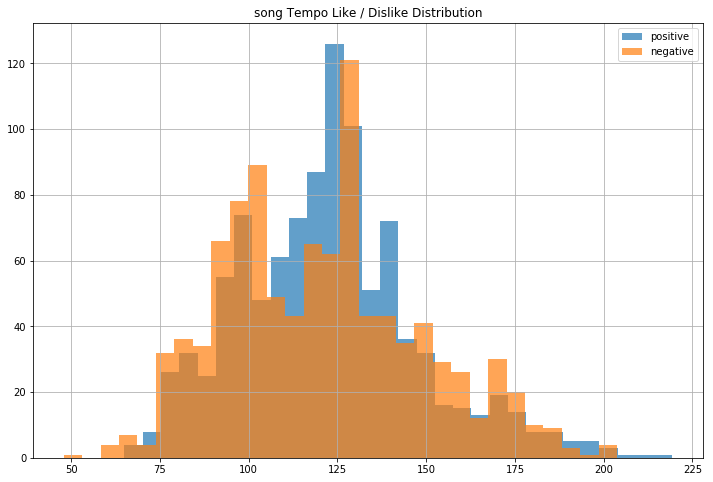

In [0]:
pos_tempo = data[data['target'] == 1]['tempo']
neg_tempo = data[data['target'] == 0]['tempo']

fig = plt.figure(figsize=(12,8))
plt.title("song Tempo Like / Dislike Distribution")
pos_tempo.hist(alpha = 0.7, bins = 30, label='positive')
neg_tempo.hist(alpha = 0.7, bins = 30, label='negative')
plt.legend(loc= "upper right")


In [0]:
red_blue = ["#195B5E","#EF4836"]
palette = sns.color_palette(red_blue)
sns.set_palette(palette)
sns.set_style("white") 

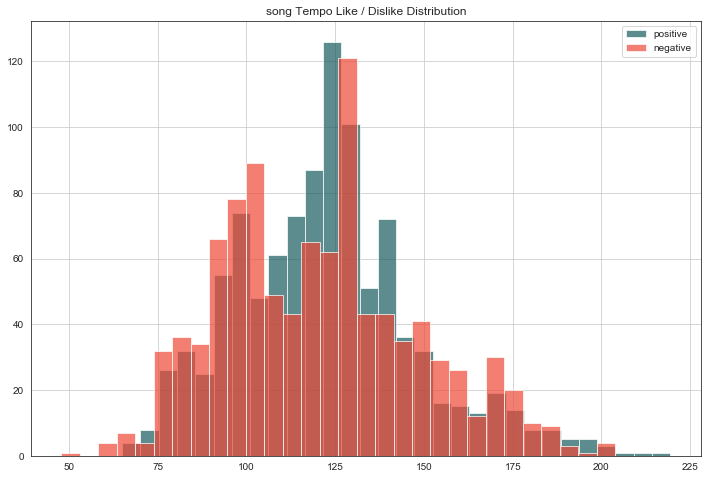

In [0]:
pos_tempo = data[data['target'] == 1]['tempo']
neg_tempo = data[data['target'] == 0]['tempo']

fig = plt.figure(figsize=(12,8))
plt.title("song Tempo Like / Dislike Distribution")
pos_tempo.hist(alpha = 0.7, bins = 30, label='positive')
neg_tempo.hist(alpha = 0.7, bins = 30, label='negative')
plt.legend(loc= "upper right")

In [0]:
pos_tempo = data[data['target'] == 1]['tempo']
neg_tempo = data[data['target'] == 0]['tempo']

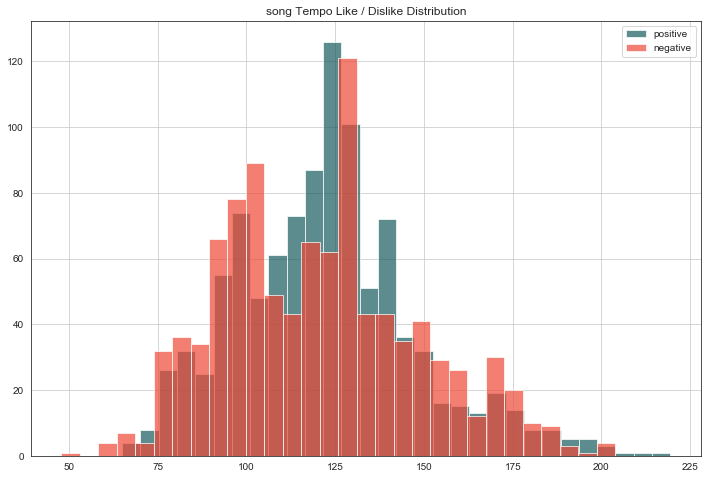

In [0]:
fig = plt.figure(figsize=(12,8))
plt.title("song Tempo Like / Dislike Distribution")
pos_tempo.hist(alpha = 0.7, bins = 30, label='positive')
neg_tempo.hist(alpha = 0.7, bins = 30, label='negative')
plt.legend(loc= "upper right")

In [0]:
pos_tempo

0       150.062
1       160.083
2        75.044
3        86.468
4       174.004
5        85.023
6        80.030
7       144.154
8       130.035
9        99.994
10      111.951
11      104.322
12      127.681
13      130.007
14      125.011
15       99.988
16      123.922
17      122.415
18      140.061
19      109.982
20      128.049
21      130.031
22      139.922
23      138.022
24       94.498
25      109.977
26      110.016
27      100.040
28      120.021
29      129.004
         ...   
990      96.990
991      96.006
992     174.062
993     130.032
994     125.993
995     129.948
996     142.584
997     142.911
998     113.074
999     174.589
1000    149.948
1001    139.639
1002    140.157
1003    139.096
1004    136.213
1005    129.989
1006    137.644
1007    137.905
1008    139.608
1009    139.725
1010    139.871
1011    139.870
1012    125.462
1013    144.256
1014     83.204
1015    139.997
1016     86.733
1017    140.008
1018    147.072
1019    107.039
Name: tempo, Length: 102

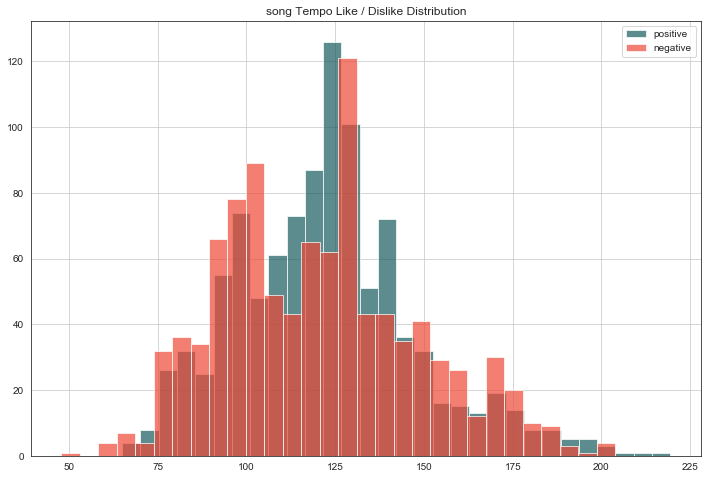

In [0]:
fig = plt.figure(figsize=(12,8))
plt.title("song Tempo Like / Dislike Distribution")
pos_tempo.hist(alpha = 0.7, bins = 30, label='positive')
neg_tempo.hist(alpha = 0.7, bins = 30, label='negative')
plt.legend(loc= "upper right")

In [0]:
pos_tempo = data[data['target'] == 1]['tempo']
neg_tempo = data[data['target'] == 0]['tempo']

pos_dance = data[data['target'] == 1]['danceability']
neg_dance = data[data['target'] == 0]['danceability']

pos_duration = data[data['target'] == 1]['duration_ms']
neg_duration = data[data['target'] == 0]['duration_ms']

pos_loudness = data[data['target'] == 1]['loudness']
neg_loudness = data[data['target'] == 0]['loudness']

pos_speechiness = data[data['target'] == 1]['speechiness']
neg_speechiness = data[data['target'] == 0]['speechiness']

pos_valence = data[data['target'] == 1]['valence']
neg_valence = data[data['target'] == 0]['valence']

pos_energy = data[data['target'] == 1]['energy']
neg_energy = data[data['target'] == 0]['energy']

pos_acousticness = data[data['target'] == 1]['acousticness']
neg_acousticness = data[data['target'] == 0]['acousticness']

pos_key = data[data['target'] == 1]['key']
neg_key = data[data['target'] == 0]['key']

pos_instrumentalness = data[data['target'] == 1]['instrumentalness']
neg_instrumentalness = data[data['target'] == 0]['instrumentalness']



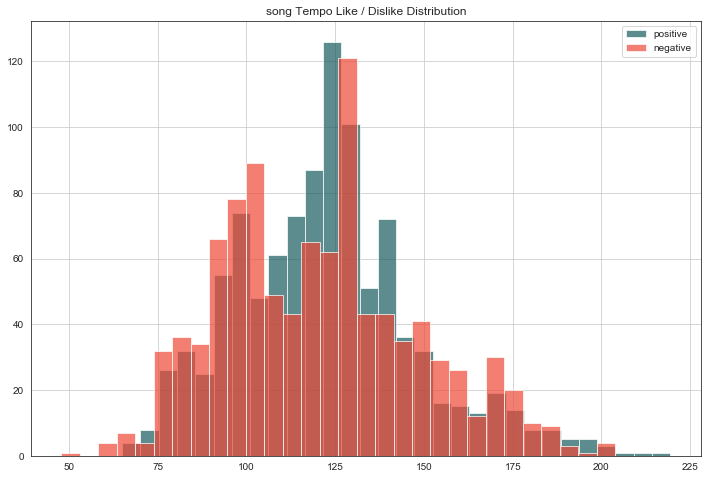

In [0]:
pos_tempo

fig = plt.figure(figsize=(12,8))
plt.title("song Tempo Like / Dislike Distribution")
pos_tempo.hist(alpha = 0.7, bins = 30, label='positive')
neg_tempo.hist(alpha = 0.7, bins = 30, label='negative')
plt.legend(loc= "upper right")

C:\Users\warid\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


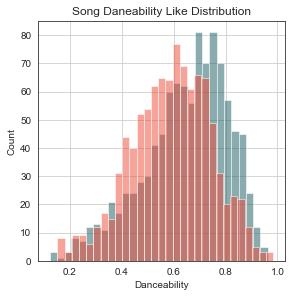

In [0]:
fig2 = plt.figure(figsize=(15,15))
ax3 = fig2.add_subplot(331)
ax3.set_xlabel('Danceability')
ax3.set_ylabel('Count')
ax3.set_title('Song Daneability Like Distribution')
pos_dance.hist(alpha = 0.5, bins = 30)
ax4 = fig2.add_subplot(331)
neg_dance.hist(alpha = 0.5, bins = 30)

C:\Users\warid\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


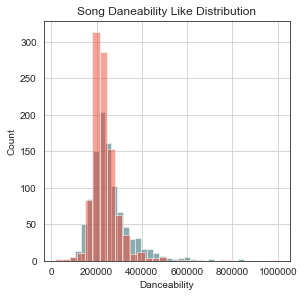

In [0]:
fig2 = plt.figure(figsize=(15,15))
ax3 = fig2.add_subplot(331)
ax3.set_xlabel('Danceability')
ax3.set_ylabel('Count')
ax3.set_title('Song Daneability Like Distribution')
pos_duration.hist(alpha = 0.5, bins = 30)
ax4 = fig2.add_subplot(331)
neg_duration.hist(alpha = 0.5, bins = 30)


C:\Users\warid\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


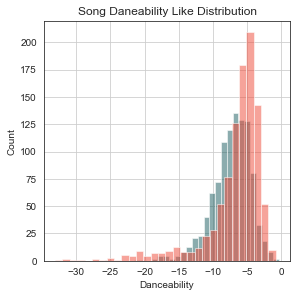

In [0]:

fig2 = plt.figure(figsize=(15,15))
ax3 = fig2.add_subplot(331)
ax3.set_xlabel('Danceability')
ax3.set_ylabel('Count')
ax3.set_title('Song Daneability Like Distribution')
pos_loudness.hist(alpha = 0.5, bins = 30)
ax4 = fig2.add_subplot(331)
neg_loudness.hist(alpha = 0.5, bins = 30)

C:\Users\warid\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


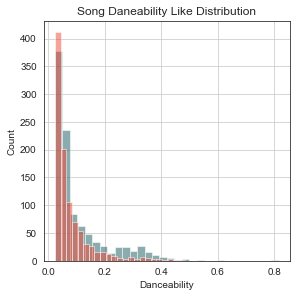

In [0]:
fig2 = plt.figure(figsize=(15,15))
ax3 = fig2.add_subplot(331)
ax3.set_xlabel('Danceability')
ax3.set_ylabel('Count')
ax3.set_title('Song Daneability Like Distribution')
pos_speechiness.hist(alpha = 0.5, bins = 30)
ax4 = fig2.add_subplot(331)
neg_speechiness.hist(alpha = 0.5, bins = 30)

C:\Users\warid\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


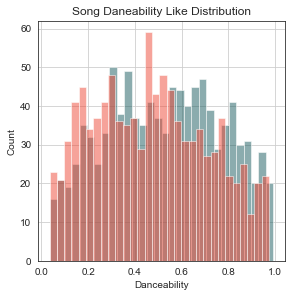

In [0]:
fig2 = plt.figure(figsize=(15,15))
ax3 = fig2.add_subplot(331)
ax3.set_xlabel('Danceability')
ax3.set_ylabel('Count')
ax3.set_title('Song Daneability Like Distribution')
pos_valence.hist(alpha = 0.5, bins = 30)
ax4 = fig2.add_subplot(331)
neg_valence.hist(alpha = 0.5, bins = 30)

C:\Users\warid\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


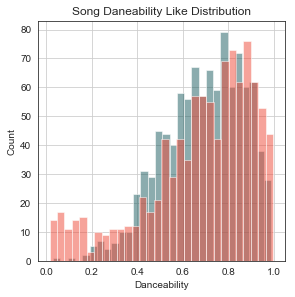

In [0]:

fig2 = plt.figure(figsize=(15,15))
ax3 = fig2.add_subplot(331)
ax3.set_xlabel('Danceability')
ax3.set_ylabel('Count')
ax3.set_title('Song Daneability Like Distribution')
pos_energy.hist(alpha = 0.5, bins = 30)
ax4 = fig2.add_subplot(331)
neg_energy.hist(alpha = 0.5, bins = 30)

C:\Users\warid\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


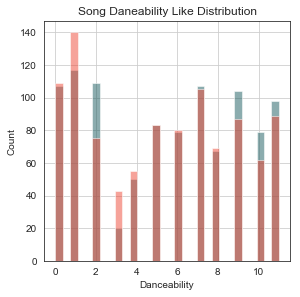

In [0]:

fig2 = plt.figure(figsize=(15,15))
ax3 = fig2.add_subplot(331)
ax3.set_xlabel('Danceability')
ax3.set_ylabel('Count')
ax3.set_title('Song Daneability Like Distribution')
pos_key.hist(alpha = 0.5, bins = 30)
ax4 = fig2.add_subplot(331)
neg_key.hist(alpha = 0.5, bins = 30)

C:\Users\warid\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


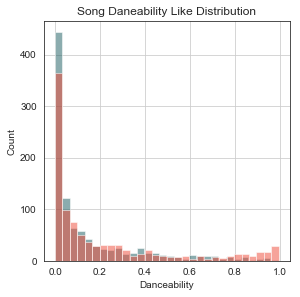

In [0]:

fig2 = plt.figure(figsize=(15,15))
ax3 = fig2.add_subplot(331)
ax3.set_xlabel('Danceability')
ax3.set_ylabel('Count')
ax3.set_title('Song Daneability Like Distribution')
pos_acousticness.hist(alpha = 0.5, bins = 30)
ax4 = fig2.add_subplot(331)
neg_acousticness.hist(alpha = 0.5, bins = 30)

C:\Users\warid\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


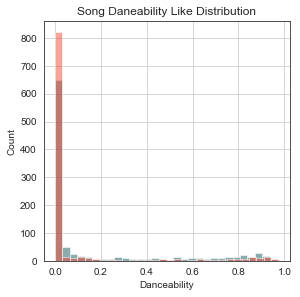

In [0]:

fig2 = plt.figure(figsize=(15,15))
ax3 = fig2.add_subplot(331)
ax3.set_xlabel('Danceability')
ax3.set_ylabel('Count')
ax3.set_title('Song Daneability Like Distribution')
pos_instrumentalness.hist(alpha = 0.5, bins = 30)
ax4 = fig2.add_subplot(331)
neg_instrumentalness.hist(alpha = 0.5, bins = 30)

C:\Users\warid\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
C:\Users\warid\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
C:\Users\warid\Anaconda3\lib\site-packages\matplotlib\figure.py:98: Matplotlib

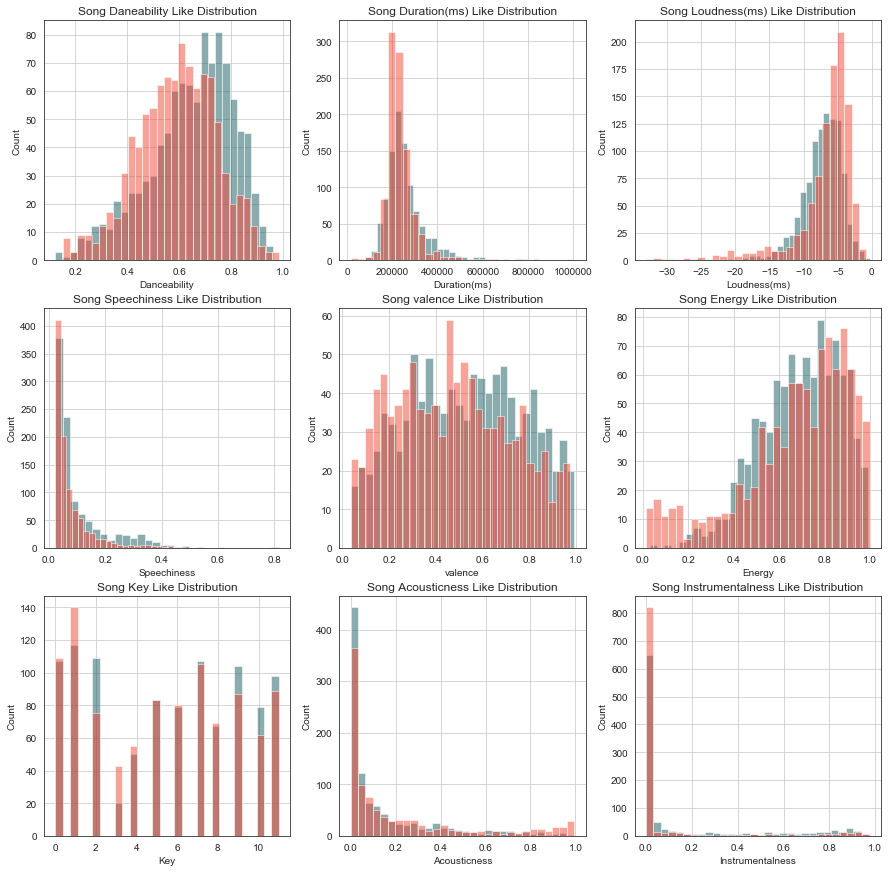

In [0]:
#danceability
fig2 = plt.figure(figsize=(15,15))
ax3 = fig2.add_subplot(331)
ax3.set_xlabel('Danceability')
ax3.set_ylabel('Count')
ax3.set_title('Song Daneability Like Distribution')
pos_dance.hist(alpha = 0.5, bins = 30)
ax4 = fig2.add_subplot(331)
neg_dance.hist(alpha = 0.5, bins = 30)



#Duration
ax5= fig2.add_subplot(332)
pos_duration.hist(alpha = 0.5, bins = 30)
ax5.set_xlabel('Duration(ms)')
ax5.set_ylabel('Count')
ax5.set_title('Song Duration(ms) Like Distribution')
ax6 = fig2.add_subplot(332)
neg_duration.hist(alpha = 0.5, bins = 30)



#Loudness
ax7= fig2.add_subplot(333)
pos_loudness.hist(alpha = 0.5, bins = 30)
ax7.set_xlabel('Loudness(ms)')
ax7.set_ylabel('Count')
ax7.set_title('Song Loudness(ms) Like Distribution')
ax8 = fig2.add_subplot(333)
neg_loudness.hist(alpha = 0.5, bins = 30)


#Speechiness
ax9= fig2.add_subplot(334)
pos_speechiness.hist(alpha = 0.5, bins = 30)
ax9.set_xlabel('Speechiness')
ax9.set_ylabel('Count')
ax9.set_title('Song Speechiness Like Distribution')
ax10 = fig2.add_subplot(334)
neg_speechiness.hist(alpha = 0.5, bins = 30)





#valence
ax11= fig2.add_subplot(335)
pos_valence.hist(alpha = 0.5, bins = 30)
ax11.set_xlabel('valence')
ax11.set_ylabel('Count')
ax11.set_title('Song valence Like Distribution')
ax12 = fig2.add_subplot(335)
neg_valence.hist(alpha = 0.5, bins = 30)


#Energy
ax13= fig2.add_subplot(336)
pos_energy.hist(alpha = 0.5, bins = 30)
ax13.set_xlabel('Energy')
ax13.set_ylabel('Count')
ax13.set_title('Song Energy Like Distribution')
ax14 = fig2.add_subplot(336)
neg_energy.hist(alpha = 0.5, bins = 30)


#Key
ax15= fig2.add_subplot(337)
pos_key.hist(alpha = 0.5, bins = 30)
ax15.set_xlabel('Key')
ax15.set_ylabel('Count')
ax15.set_title('Song Key Like Distribution')
ax15 = fig2.add_subplot(337)
neg_key.hist(alpha = 0.5, bins = 30)



#Acousticness
ax16= fig2.add_subplot(338)
pos_acousticness.hist(alpha = 0.5, bins = 30)
ax16.set_xlabel('Acousticness')
ax16.set_ylabel('Count')
ax16.set_title('Song Acousticness Like Distribution')
ax16 = fig2.add_subplot(338)
neg_acousticness.hist(alpha = 0.5, bins = 30)


#Instrumentalness
ax17= fig2.add_subplot(339)
pos_instrumentalness.hist(alpha = 0.5, bins = 30)
ax17.set_xlabel('Instrumentalness')
ax17.set_ylabel('Count')
ax17.set_title('Song Instrumentalness Like Distribution')
ax17 = fig2.add_subplot(339)
neg_instrumentalness.hist(alpha = 0.5, bins = 30)


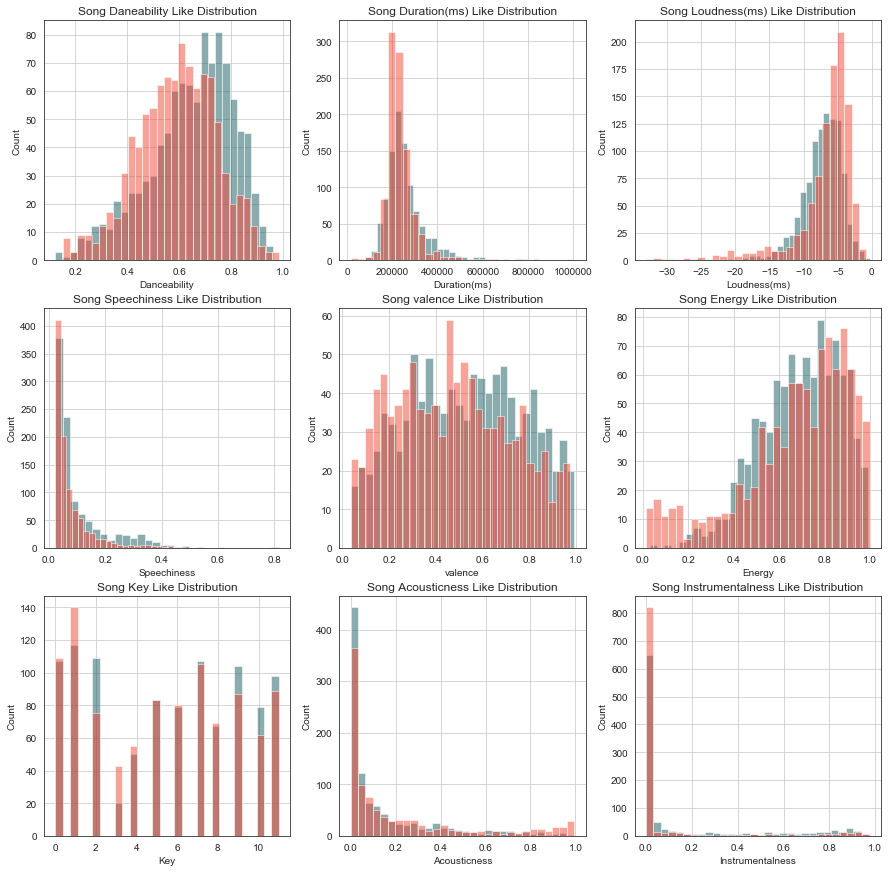

In [0]:
#danceability
fig2 = plt.figure(figsize=(15,15))
ax3 = fig2.add_subplot(331)
ax3.set_xlabel('Danceability')
ax3.set_ylabel('Count')
ax3.set_title('Song Daneability Like Distribution')
pos_dance.hist(alpha = 0.5, bins = 30)

neg_dance.hist(alpha = 0.5, bins = 30)



#Duration
ax5= fig2.add_subplot(332)
pos_duration.hist(alpha = 0.5, bins = 30)
ax5.set_xlabel('Duration(ms)')
ax5.set_ylabel('Count')
ax5.set_title('Song Duration(ms) Like Distribution')

neg_duration.hist(alpha = 0.5, bins = 30)



#Loudness
ax7= fig2.add_subplot(333)
pos_loudness.hist(alpha = 0.5, bins = 30)
ax7.set_xlabel('Loudness(ms)')
ax7.set_ylabel('Count')
ax7.set_title('Song Loudness(ms) Like Distribution')

neg_loudness.hist(alpha = 0.5, bins = 30)


#Speechiness
ax9= fig2.add_subplot(334)
pos_speechiness.hist(alpha = 0.5, bins = 30)
ax9.set_xlabel('Speechiness')
ax9.set_ylabel('Count')
ax9.set_title('Song Speechiness Like Distribution')

neg_speechiness.hist(alpha = 0.5, bins = 30)





#valence
ax11= fig2.add_subplot(335)
pos_valence.hist(alpha = 0.5, bins = 30)
ax11.set_xlabel('valence')
ax11.set_ylabel('Count')
ax11.set_title('Song valence Like Distribution')

neg_valence.hist(alpha = 0.5, bins = 30)


#Energy
ax13= fig2.add_subplot(336)
pos_energy.hist(alpha = 0.5, bins = 30)
ax13.set_xlabel('Energy')
ax13.set_ylabel('Count')
ax13.set_title('Song Energy Like Distribution')

neg_energy.hist(alpha = 0.5, bins = 30)


#Key
ax15= fig2.add_subplot(337)
pos_key.hist(alpha = 0.5, bins = 30)
ax15.set_xlabel('Key')
ax15.set_ylabel('Count')
ax15.set_title('Song Key Like Distribution')

neg_key.hist(alpha = 0.5, bins = 30)



#Acousticness
ax16= fig2.add_subplot(338)
pos_acousticness.hist(alpha = 0.5, bins = 30)
ax16.set_xlabel('Acousticness')
ax16.set_ylabel('Count')
ax16.set_title('Song Acousticness Like Distribution')

neg_acousticness.hist(alpha = 0.5, bins = 30)


#Instrumentalness
ax17= fig2.add_subplot(339)
pos_instrumentalness.hist(alpha = 0.5, bins = 30)
ax17.set_xlabel('Instrumentalness')
ax17.set_ylabel('Count')
ax17.set_title('Song Instrumentalness Like Distribution')

neg_instrumentalness.hist(alpha = 0.5, bins = 30)


C:\Users\warid\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


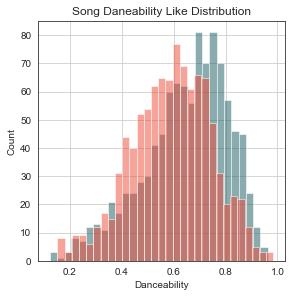

In [0]:
fig2 = plt.figure(figsize=(15,15))
ax3 = fig2.add_subplot(331)
ax3.set_xlabel('Danceability')
ax3.set_ylabel('Count')
ax3.set_title('Song Daneability Like Distribution')
pos_dance.hist(alpha = 0.5, bins = 30)
ax4 = fig2.add_subplot(331)
neg_dance.hist(alpha = 0.5, bins = 30)

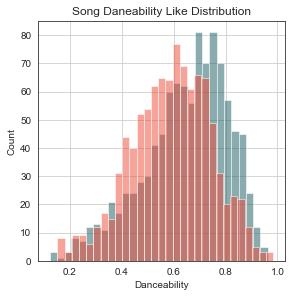

In [0]:
fig2 = plt.figure(figsize=(15,15))
ax5 = fig2.add_subplot(332)
ax5.set_xlabel('Danceability')
ax5.set_ylabel('Count')
ax5.set_title('Song Daneability Like Distribution')
pos_dance.hist(alpha = 0.5, bins = 30)

neg_dance.hist(alpha = 0.5, bins = 30)

In [0]:
c = DecisionTreeClassifier(min_samples_split=100)

In [0]:
c = DecisionTreeClassifier(min_samples_split=100)

In [0]:
features = ["danceability","loudness","speechiness","valence","energy","key","acousticness","instrumentalness"]

In [0]:
x_train = train[features]
y_train = train["target"]

x_test = test[features]
y_test = test["target"]

In [0]:
features = ["danceability","loudness","speechiness","valence","energy","key","acousticness","instrumentalness"]

In [0]:
x_train = train[features]
y_train = train["target"]

x_test = test[features]
y_test = test["target"]

In [0]:
y_test

1141    0
1392    0
1171    0
913     1
1848    0
1454    0
366     1
1869    0
445     1
954     1
235     1
1329    0
194     1
1614    0
1365    0
1474    0
475     1
1266    0
148     1
1080    0
229     1
1846    0
621     1
1598    0
51      1
1281    0
1269    0
200     1
36      1
1157    0
       ..
448     1
379     1
141     1
1800    0
1229    0
191     1
1143    0
1448    0
556     1
338     1
1813    0
252     1
56      1
248     1
635     1
948     1
1330    0
322     1
823     1
1004    1
175     1
504     1
91      1
1938    0
1407    0
638     1
320     1
1339    0
810     1
286     1
Name: target, Length: 303, dtype: int64

In [0]:
y_test

1141    0
1392    0
1171    0
913     1
1848    0
1454    0
366     1
1869    0
445     1
954     1
235     1
1329    0
194     1
1614    0
1365    0
1474    0
475     1
1266    0
148     1
1080    0
229     1
1846    0
621     1
1598    0
51      1
1281    0
1269    0
200     1
36      1
1157    0
       ..
448     1
379     1
141     1
1800    0
1229    0
191     1
1143    0
1448    0
556     1
338     1
1813    0
252     1
56      1
248     1
635     1
948     1
1330    0
322     1
823     1
1004    1
175     1
504     1
91      1
1938    0
1407    0
638     1
320     1
1339    0
810     1
286     1
Name: target, Length: 303, dtype: int64

In [0]:
dt = c.fit(x_train,y_train)

In [0]:
import pydot
from io import StringIO
from io import BytesIO as StringIO

In [0]:
def show_tree(tree, features, path):
    f = io.StringIO()
    export_graphviz(tree, out_file=f, feature_names=features)
    pydotplus.graph_from_dot_data(f.getvalue()).write_png(path)
    img = misc.imread(path)
    plt.rcParams["figure.figsize"] = (20,20)
    plt.imshow(img)

C:\Users\warid\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """


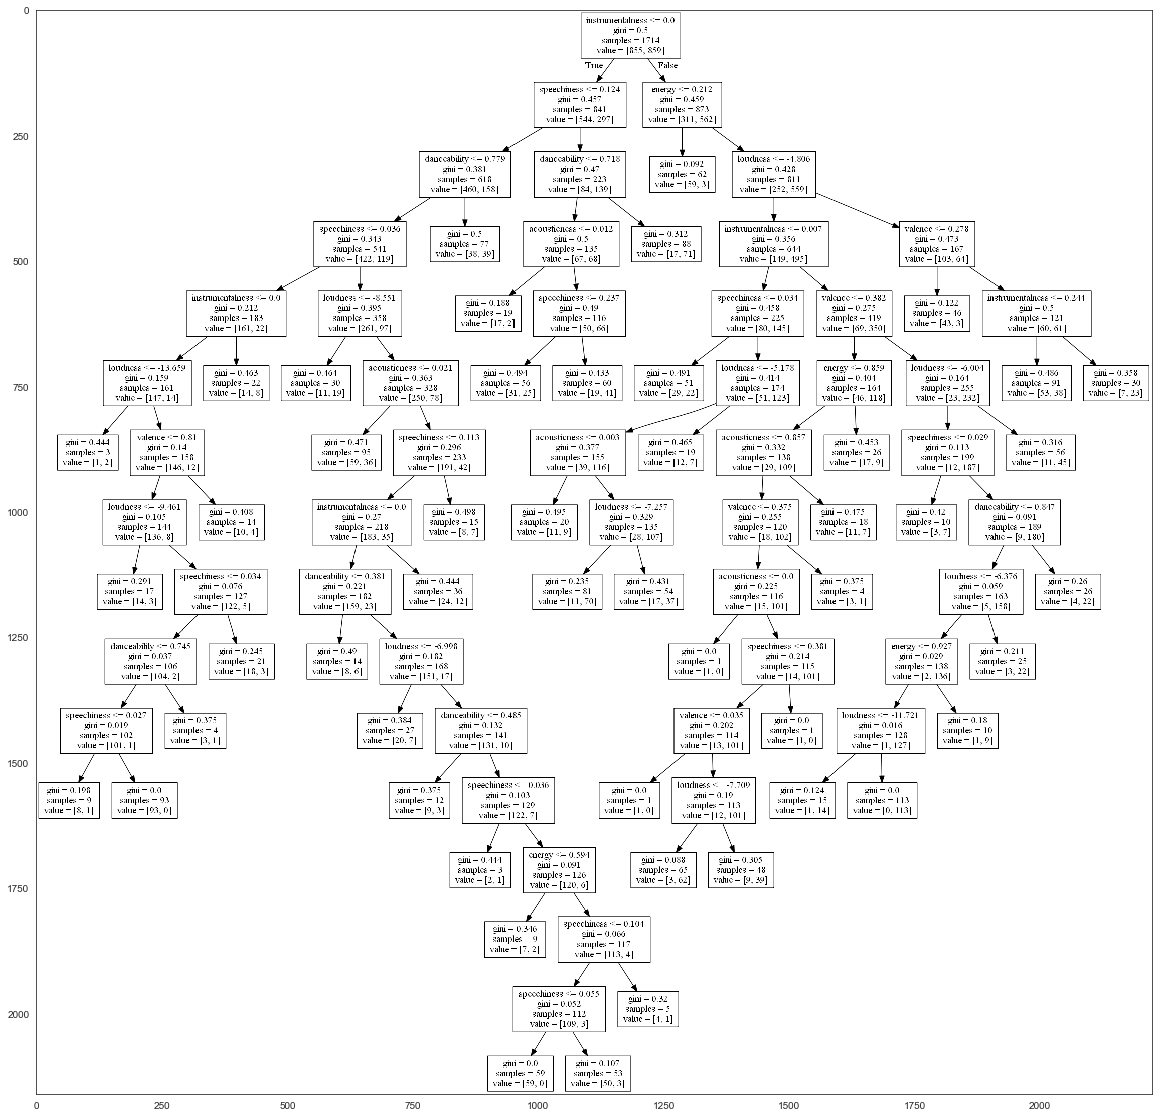

In [0]:
show_tree(dt, features, 'dec_tree_01.png')

In [0]:
def show_tree(tree, features, path):
    f = io.StringIO()
    export_graphviz(tree, out_file=f, feature_names=features)
    pydotplus.graph_from_dot_data(f.getvalue()).write_png(path)
    img = misc.imread(path)
    plt.rcParams["figure.figsize"] = (20,20)
    plt.imshow(img)

C:\Users\warid\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """


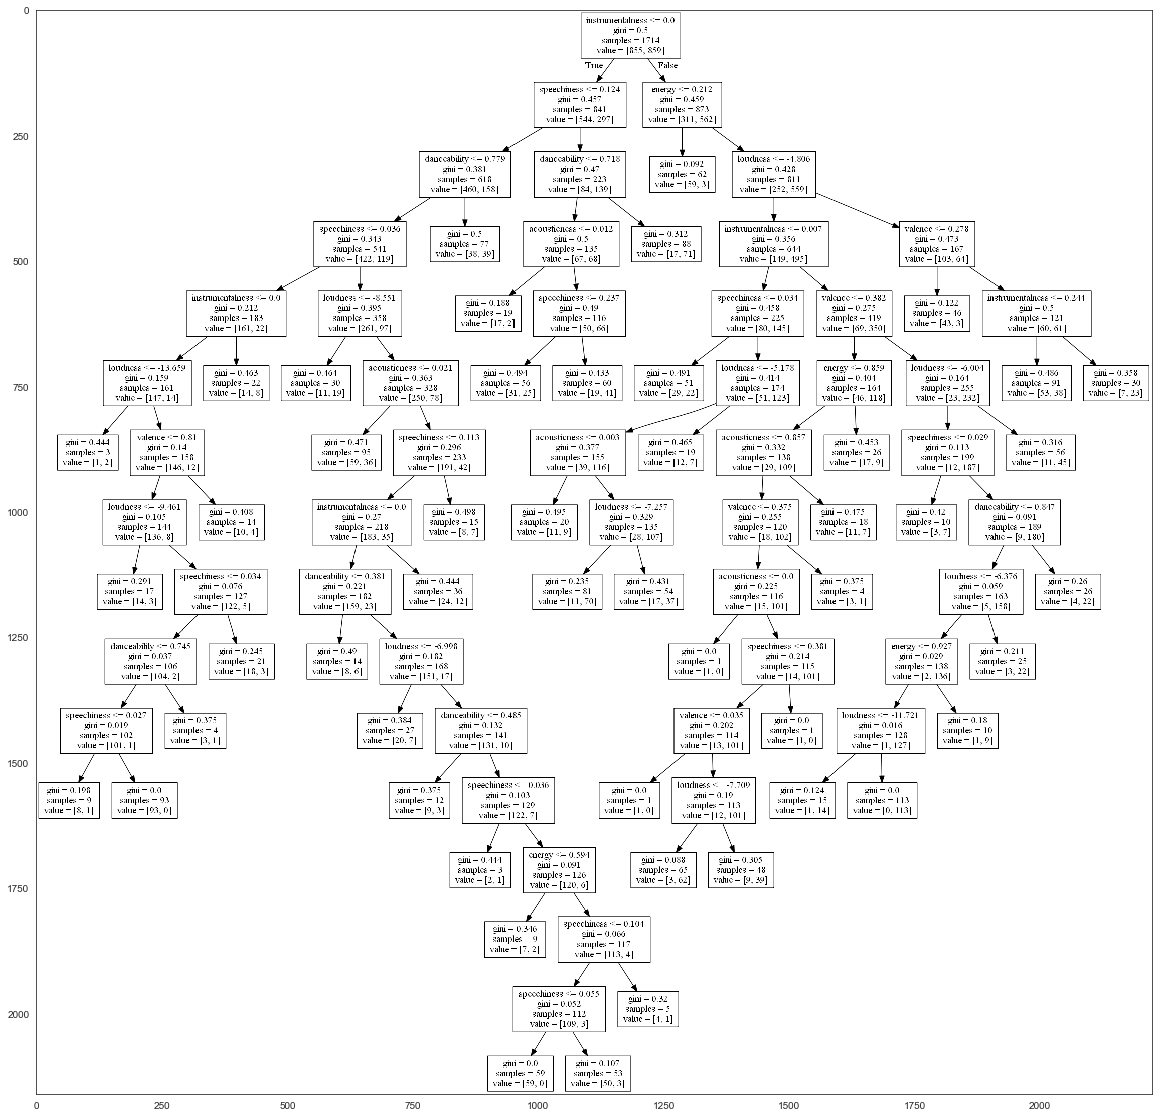

In [0]:
show_tree(dt,features,'dec_tree_01.png')